In [1]:
## KNN on iris dataset

In [2]:
#Distance measure
#KNN used to measure ditance between featrure of same of differnet class
#  and put it together
# how much k value should be
# Ecludian distance = sqaure of distance between two points

# d(p,q) = sqaure_root9((x2-x1)2 - (y2-y1)2)

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()        #type is dataframe

In [5]:
type(iris)

sklearn.utils.Bunch

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names                 #target is dependent variable

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)                #bind data with feature name
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [9]:
df['target'] = iris.target

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
#to cheak target value for all row is it 0,1,2    for three target value
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [12]:
#for target we are having three value  i,e setosa', 'versicolor', 'virginica'  hence for target 5 is not existing 
df[df.target == 5].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


In [13]:
# using lambda we can apply at particular point for specific class
df['flowername'] = df.target.apply(lambda x:iris.target_names[x])

In [14]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowername
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [15]:
import matplotlib.pyplot as plt

In [16]:
#divide whole data im three parts
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

Text(0.5, 1.0, 'Sepal length vs sepal width')

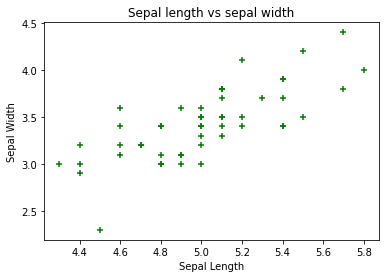

In [17]:

plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green',marker = '+')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("Sepal length vs sepal width")

Text(0.5, 1.0, 'Sepal length vs sepal width')

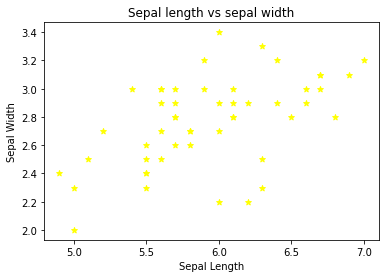

In [18]:

plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'yellow',marker = '*')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("Sepal length vs sepal width")

Text(0.5, 1.0, 'Sepal length vs sepal width')

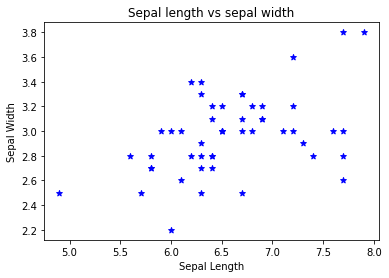

In [19]:

plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = 'Blue',marker = '*')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("Sepal length vs sepal width")

Text(0.5, 1.0, 'Sepal length vs sepal width')

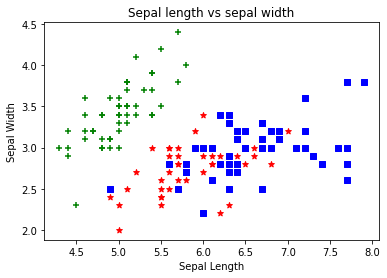

In [20]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green',marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'red',marker = '*')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = 'blue',marker = ',')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("Sepal length vs sepal width")

Text(0.5, 1.0, 'petal length vs petal width')

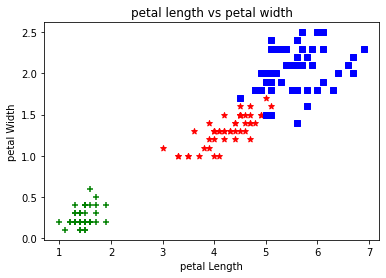

In [21]:
# try for petal length and petal width follow same procedure
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'green',marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'red',marker = '*')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'blue',marker = ',')
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title("petal length vs petal width")


In [22]:
#fit model
from sklearn.model_selection import train_test_split

#remove 0r drop 

x = df.drop(['target','flowername'],axis = 1)
y = df.target

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [24]:

len(x_train)

105

In [25]:
x_train.shape

(105, 4)

In [26]:
from sklearn.neighbors import KNeighborsClassifier 

In [27]:
#Build knn model
knn_model = KNeighborsClassifier(n_neighbors = 10)       # n_neighbors is by default takes 5 value which is mean k 


In [28]:
#fit the model means we train the model ,model is ready

knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
# now we predict the model
#if we want to predict on unkown data i.e. unseen data which your model want to predict follow following procedure

y_pred = knn_model.predict([[4.8,3.6,1.0,2.5]])            # this is in the format of train_test_split
y_pred

#array([0]) means they are finding class for you


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [30]:
# now we predict the model

y_pred = knn_model.predict(x_test)
y_pred

#value 0,1,2 indicates the classes 

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1])

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
         #confusion_matrix is best for classifcation

In [32]:
#find score
accuracy_score = accuracy_score(y_test,y_pred)
accuracy_score


0.9777777777777777

In [33]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix


array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

In [34]:
# do Classification recored i.e. precision,recall.f1-score & support
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [35]:
import seaborn as sns

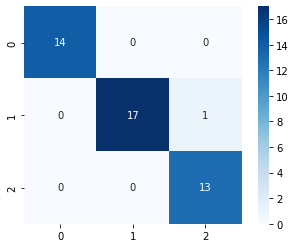

In [36]:
sns.heatmap(confusion_matrix,square = True,fmt = 'd',cmap = 'Blues',annot = True)